## Brussels municipalities vs. Ljubljana Bežigrad

A hidden cell with some keys:

In [1]:
# The code was removed by Watson Studio for sharing.

First, lets import the Wikipedia page that has the data about Brussels municipalities:

In [44]:
!pip install folium
import folium
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

website_url = requests.get('https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Brussels-Capital_Region').text

soup = BeautifulSoup(website_url,'html.parser')

# Extract the relevant table
table = soup.find('table',{'class':'wikitable sortable'})

Requirement not upgraded as not directly required: folium in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: branca>=0.3.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=

Now let's extract the municipalities and manually add Ljubljana-Bežigrad. I will only use the French versions (no reason, but I need to choose just one):

In [3]:
td1 = table.find_all('td',{'style':"text-align:left"})

str_td1 = (str(td1))
str_td1 = str_td1.replace("[", '').replace("]", '').replace(",", '').replace("*", '')  # Clean up the string

td2 = BeautifulSoup(str_td1,'html.parser').getText(' ') # Get the text without html code

# Clean up the cells
municipalities = td2.replace( "*","")
municipalities = td2.split(" \n   ")
municipalities = municipalities[::2] # Only take the French versions of the names
municipalities.append("Ljubljana-Bezigrad") # Add one from Ljubljana - Bežigrad
municipalities

['Anderlecht',
 'Auderghem',
 'Berchem-Sainte-Agathe',
 'Bruxelles-Ville',
 'Etterbeek',
 'Evere',
 'Forest',
 'Ganshoren',
 'Ixelles',
 'Jette',
 'Koekelberg',
 'Molenbeek-Saint-Jean',
 'Saint-Gilles',
 'Saint-Josse-ten-Noode',
 'Schaerbeek',
 'Uccle',
 'Watermael-Boitsfort',
 'Woluwe-Saint-Lambert',
 'Woluwe-Saint-Pierre',
 'Ljubljana-Bezigrad']

To make sure comparison makes sense, let's also extract the population data:

In [4]:
td_pop = table.find_all('td',{'style':"text-align:right;"})

str_td_pop = (str(td_pop))
str_td_pop = str_td_pop.replace("[", '').replace("]", '').replace(",", '').replace("*", '')  # Clean up the string

td_pop_bs = BeautifulSoup(str_td_pop,'html.parser').getText(' ') # Get the text without html code

population = td_pop_bs.replace( "*","")
population = td_pop_bs.split("\n   ")
population = population[::2] # Only take the population data and skip population density data
population.append("34687") # Add one from Ljubljana - Bežigrad
population

['118241',
 '33313',
 '24701',
 '176545',
 '47414',
 '40394',
 '55746',
 '24596',
 '86244',
 '51933',
 '21609',
 '96629',
 '50471',
 '27115',
 '133042',
 '82307',
 '24871',
 '55216',
 '41217',
 '34687']

Let's put it in a dataframe:

In [5]:
df = pd.DataFrame(
    {'Neighborhood': municipalities,
     'Population': population
    })

df

,Neighborhood,Population
0,Anderlecht,118241
1,Auderghem,33313
2,Berchem-Sainte-Agathe,24701
3,Bruxelles-Ville,176545
4,Etterbeek,47414
5,Evere,40394
6,Forest,55746
7,Ganshoren,24596
8,Ixelles,86244
9,Jette,51933


Let's visualise the dataframe:

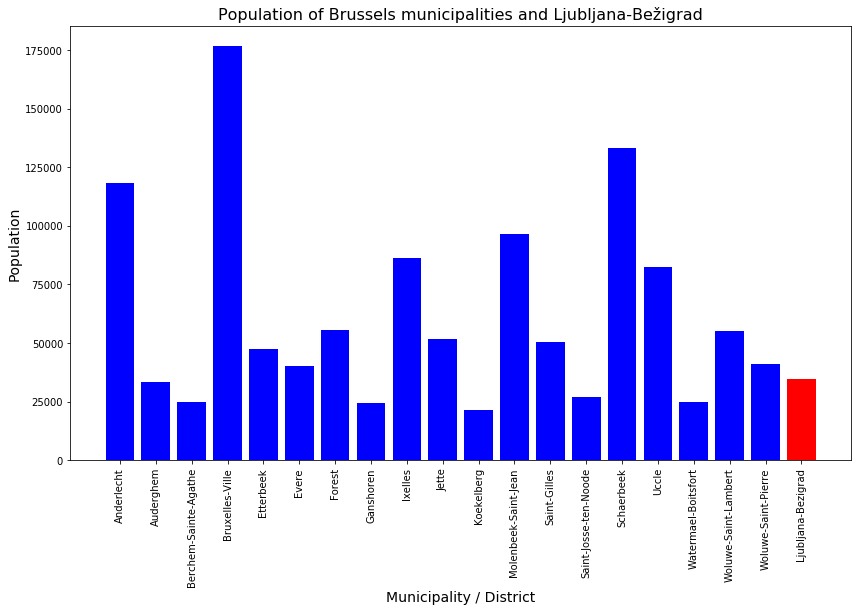

In [6]:
fig = mpl.pyplot.gcf()
fig.set_size_inches(14, 8, forward=True)

df[['Population']] = df[['Population']].apply(pd.to_numeric)

plt.bar(df.index, df['Population'], color=['b', 'b', 'b', 'b', 'b','b', 'b', 'b', 'b', 'b','b', 'b', 'b', 'b', 'b','b', 'b', 'b', 'b', 'r'])
plt.xticks(df.index, df['Neighborhood'], rotation=90)
plt.xlabel('Municipality / District', size=14) # add to x-label to the plot
plt.ylabel('Population', size=14) # add y-label to the plot
plt.title('Population of Brussels municipalities and Ljubljana-Bežigrad', size=16) # add title to the plot
plt.show()

Based on the graph, Ljubljana-Bežigrad population is comparable to population of Brussels municipalities. Let's continue and add geolocation data:

In [7]:
# construct URL to make API call
latitude=[]
longitude=[]
i=0
for municipality in municipalities:
    url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(API_key,"brussels"+ municipality) # "brusels" doesn't affect the correct result for Ljubljana-Bežigrad
    response = requests.get(url).json() # get response
    print(response)
    geographical_data = response['results'][0]['geometry']['location'] # get geographical coordinates
    latitude.append(geographical_data['lat'])
    longitude.append(geographical_data['lng']) 

{'results': [{'geometry': {'viewport': {'northeast': {'lng': 4.34026, 'lat': 50.85022}, 'southwest': {'lng': 4.2446001, 'lat': 50.80707}}, 'location_type': 'APPROXIMATE', 'bounds': {'northeast': {'lng': 4.34026, 'lat': 50.85022}, 'southwest': {'lng': 4.2446001, 'lat': 50.80707}}, 'location': {'lng': 4.308187, 'lat': 50.8365808}}, 'partial_match': True, 'place_id': 'ChIJqQUDttGkw0cRb6C525B3p-s', 'address_components': [{'long_name': 'Anderlecht', 'types': ['locality', 'political'], 'short_name': 'Anderlecht'}, {'long_name': 'Brussels', 'types': ['administrative_area_level_1', 'political'], 'short_name': 'Brussels'}, {'long_name': 'Belgium', 'types': ['country', 'political'], 'short_name': 'BE'}, {'long_name': '1070', 'types': ['postal_code'], 'short_name': '1070'}], 'types': ['locality', 'political'], 'formatted_address': '1070 Anderlecht, Belgium'}], 'status': 'OK'}
{'results': [{'geometry': {'viewport': {'northeast': {'lng': 4.4822099, 'lat': 50.82699}, 'southwest': {'lng': 4.394159999

Add the new data to the existing dataframe:

In [8]:
lat_ser = pd.Series(latitude)
lon_ser = pd.Series(longitude)

df['Latitude'] = lat_ser.values
df['Longitude'] = lon_ser.values

df.head(20)

,Neighborhood,Population,Latitude,Longitude
0,Anderlecht,118241,50.836581,4.308187
1,Auderghem,33313,50.816406,4.426518
2,Berchem-Sainte-Agathe,24701,50.865782,4.292597
3,Bruxelles-Ville,176545,50.850340,4.351710
4,Etterbeek,47414,50.832578,4.388994
5,Evere,40394,50.873935,4.400942
6,Forest,55746,50.813433,4.324834
7,Ganshoren,24596,50.872987,4.309333
8,Ixelles,86244,50.833343,4.366629
9,Jette,51933,50.880858,4.322789


Let's take a quick look how Brussels municipalities look like:

In [10]:
# create map using latitude and longitude values
latitude_bru = 50.802398
longitude_bru = 4.340670

map_brussels = folium.Map(location=[latitude_bru, longitude_bru], zoom_start=10)

# add markers to map
for lat, lng, municipalities in zip(latitude, longitude, municipalities):
    label = '{}'.format(municipalities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_brussels)  
    
map_brussels

    100% |████████████████████████████████| 81kB 2.7MB/s ta 0:00:01
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Pyt

Moving on to Foursquare data. First, let's make sure that Ljubljana-Bežigrad returns a good result, given that it's perhaps a less known destination: 

In [17]:
radius = 500
LIMIT = 100

# Get lat and lon for Ljubljana-Bežigrad from dataframe
lat_lj = df.at[19,'Latitude']
lon_lj = df.at[19,'Longitude']

# Generating a call with Ljubljana-Bežigrad lat and lon
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat_lj,
    lon_lj,
    radius, 
    LIMIT)

results = requests.get(url).json()
results

https://api.foursquare.com/v2/venues/explore?&client_id=5SB4LFGMS5LKMKLVGVYWOAESISPORMFFS1VFHYZPDU24AHSN&client_secret=K1TQR2JVTB3UUS5S4PE3EH5I1ZKVDBCUUTLCGUAV1ZUE5YUJ&v=20180605&ll=46.0766394,14.5170118&radius=500&limit=100


{'meta': {'code': 200, 'requestId': '5b73000b9fb6b77eb4a640e0'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-52b2db9911d212bc0da8327a-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1c5941735',
         'name': 'Sandwich Place',
         'pluralName': 'Sandwich Places',
         'primary': True,
         'shortName': 'Sandwiches'}],
       'id': '52b2db9911d212bc0da8327a',
       'location': {'address': 'Dunajska cesta 115a',
        'cc': 'SI',
        'city': 'Ljubljana',
        'country': 'Slovenija',
        'distance': 468,
        'formattedAddress': ['Dunajska cesta 115a',
         '1000 Ljubljana',
         'Slovenija'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 4

Great! There is enough data. Now let's prepare some functions and begin extracting data for all the areas.

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

A funcition to loop trough all the areas:

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now lets run the function and take a peek at result:

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

10 venues were returned by Foursquare.


,name,categories,lat,lng
0,Subway,Sandwich Place,46.075130,14.511344
1,Pizzerija Piramida,Pizza Place,46.077560,14.519330
2,Favola,Italian Restaurant,46.078184,14.512142
3,Market Mercator,Convenience Store,46.077771,14.519486
4,Market Mercator,Convenience Store,46.079870,14.517080


Data for Ljubljana looks ok (I even know some of the places). Let's proceed with the whole dataframe now:

In [21]:
mun_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Anderlecht
Auderghem
Berchem-Sainte-Agathe
Bruxelles-Ville
Etterbeek
Evere
Forest
Ganshoren
Ixelles
Jette
Koekelberg
Molenbeek-Saint-Jean
Saint-Gilles
Saint-Josse-ten-Noode
Schaerbeek
Uccle
Watermael-Boitsfort
Woluwe-Saint-Lambert
Woluwe-Saint-Pierre
Ljubljana-Bezigrad


Let's again take a peek:

In [22]:
print(mun_venues.shape)
mun_venues.head()

(611, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderlecht,50.836581,4.308187,Snack Mirvan,50.835176,4.308543,Snack Place
1,Anderlecht,50.836581,4.308187,Le Chapeau Blanc,50.835034,4.307790,Restaurant
2,Anderlecht,50.836581,4.308187,Friture René,50.835846,4.311632,Friterie
3,Anderlecht,50.836581,4.308187,C'est Si Bon,50.834324,4.304310,Bakery
4,Anderlecht,50.836581,4.308187,Le Prestige,50.838144,4.304794,Bar


Moving on to one-hot encoding, required for consequential K-means analisys:

In [25]:
# one hot encoding
mun_onehot = pd.get_dummies(mun_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mun_onehot['Neighborhood'] = mun_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mun_onehot.columns[-1]] + list(mun_onehot.columns[:-1])
mun_onehot = mun_onehot[fixed_columns]

mun_onehot.head()

,Neighborhood,African Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anderlecht,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Anderlecht,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's take a peek at top 5 venues for each area:

In [26]:
mun_onehot = mun_onehot.groupby('Neighborhood').mean().reset_index()
mun_grouped = mun_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in mun_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mun_grouped[mun_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderlecht----
           venue  freq
0  Grocery Store  0.11
1         Bakery  0.11
2          Plaza  0.07
3     Restaurant  0.07
4            Bar  0.07


----Auderghem----
                       venue  freq
0       Fast Food Restaurant  0.07
1                Pizza Place  0.05
2                        Bar  0.05
3            Thai Restaurant  0.05
4  Middle Eastern Restaurant  0.05


----Berchem-Sainte-Agathe----
               venue  freq
0        Supermarket  0.17
1   Greek Restaurant  0.17
2         Restaurant  0.08
3              Plaza  0.08
4  French Restaurant  0.08


----Bruxelles-Ville----
                venue  freq
0                 Bar  0.06
1              Bakery  0.04
2  Belgian Restaurant  0.04
3      Chocolate Shop  0.03
4      Sandwich Place  0.03


----Etterbeek----
            venue  freq
0             Bar  0.09
1     Snack Place  0.06
2             Gym  0.06
3  Sandwich Place  0.06
4     Pizza Place  0.06


----Evere----
            venue  freq
0          Bakery  0.

Let's prepare a more sorted list:

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mun_grouped['Neighborhood']

for ind in np.arange(mun_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mun_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,Bakery,Grocery Store,Plaza,Restaurant,Bar,Greek Restaurant,Supermarket,History Museum,Friterie,Concert Hall
1,Auderghem,Fast Food Restaurant,Thai Restaurant,Grocery Store,French Restaurant,Middle Eastern Restaurant,Bar,Sushi Restaurant,Pizza Place,Ice Cream Shop,Shoe Store
2,Berchem-Sainte-Agathe,Supermarket,Greek Restaurant,Plaza,Pharmacy,Snack Place,Burger Joint,French Restaurant,Bakery,Gym,Restaurant
3,Bruxelles-Ville,Bar,Belgian Restaurant,Bakery,Sandwich Place,Plaza,Burger Joint,Chocolate Shop,Hotel,Bookstore,Seafood Restaurant
4,Etterbeek,Bar,Sandwich Place,Gym,Snack Place,Plaza,Supermarket,Pizza Place,Thai Restaurant,Diner,Portuguese Restaurant
5,Evere,Bakery,Supermarket,Pharmacy,Spa,Sandwich Place,Restaurant,Theater,Brasserie,History Museum,Video Store
6,Forest,Bus Stop,Concert Hall,Tennis Court,Park,Pizza Place,Daycare,Music Venue,Chinese Restaurant,Movie Theater,Lounge
7,Ganshoren,Bar,Friterie,Plaza,Bakery,Italian Restaurant,Castle,Chinese Restaurant,Thai Restaurant,Boutique,Pool
8,Ixelles,Italian Restaurant,Bar,Bakery,Japanese Restaurant,Belgian Restaurant,Tea Room,Fried Chicken Joint,African Restaurant,Hotel,Wine Bar
9,Jette,Bar,Snack Place,Park,Bakery,Bus Station,Brasserie,Bed & Breakfast,Library,Restaurant,Sushi Restaurant


How many unique categories are there?

In [33]:
print('There are {} uniques categories.'.format(len(mun_venues['Venue Category'].unique())))

There are 174 uniques categories.


Prepare the function for K-means analisys:

In [52]:
# set number of clusters
kclusters = 3

mun_grouped_clustering = mun_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mun_grouped_clustering)

mun_merged = df.copy()

# add clustering labels
mun_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mun_merged = mun_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mun_merged.head(20) # check the last columns!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,118241,50.836581,4.308187,0,Bakery,Grocery Store,Plaza,Restaurant,Bar,Greek Restaurant,Supermarket,History Museum,Friterie,Concert Hall
1,Auderghem,33313,50.816406,4.426518,0,Fast Food Restaurant,Thai Restaurant,Grocery Store,French Restaurant,Middle Eastern Restaurant,Bar,Sushi Restaurant,Pizza Place,Ice Cream Shop,Shoe Store
2,Berchem-Sainte-Agathe,24701,50.865782,4.292597,0,Supermarket,Greek Restaurant,Plaza,Pharmacy,Snack Place,Burger Joint,French Restaurant,Bakery,Gym,Restaurant
3,Bruxelles-Ville,176545,50.850340,4.351710,0,Bar,Belgian Restaurant,Bakery,Sandwich Place,Plaza,Burger Joint,Chocolate Shop,Hotel,Bookstore,Seafood Restaurant
4,Etterbeek,47414,50.832578,4.388994,0,Bar,Sandwich Place,Gym,Snack Place,Plaza,Supermarket,Pizza Place,Thai Restaurant,Diner,Portuguese Restaurant
5,Evere,40394,50.873935,4.400942,0,Bakery,Supermarket,Pharmacy,Spa,Sandwich Place,Restaurant,Theater,Brasserie,History Museum,Video Store
6,Forest,55746,50.813433,4.324834,0,Bus Stop,Concert Hall,Tennis Court,Park,Pizza Place,Daycare,Music Venue,Chinese Restaurant,Movie Theater,Lounge
7,Ganshoren,24596,50.872987,4.309333,0,Bar,Friterie,Plaza,Bakery,Italian Restaurant,Castle,Chinese Restaurant,Thai Restaurant,Boutique,Pool
8,Ixelles,86244,50.833343,4.366629,0,Italian Restaurant,Bar,Bakery,Japanese Restaurant,Belgian Restaurant,Tea Room,Fried Chicken Joint,African Restaurant,Hotel,Wine Bar
9,Jette,51933,50.880858,4.322789,0,Bar,Snack Place,Park,Bakery,Bus Station,Brasserie,Bed & Breakfast,Library,Restaurant,Sushi Restaurant


Se clusters for both cities on a map. First Brussels:

In [53]:
# create map
map_clusters = folium.Map(location=[latitude_bru, longitude_bru], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mun_merged['Latitude'], mun_merged['Longitude'], mun_merged['Neighborhood'], mun_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

And Ljubljana:

In [54]:
map_clusters_lj = folium.Map(location=[46.056946, 14.505751], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(mun_merged['Latitude'], mun_merged['Longitude'], mun_merged['Neighborhood'], mun_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_lj)

map_clusters_lj

Let's also try how it would look like with five groups:

In [56]:
# set number of clusters
kclusters = 5

mun_grouped_clustering = mun_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mun_grouped_clustering)

mun_merged = df.copy()

# add clustering labels
mun_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mun_merged = mun_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mun_merged.head(20) # check the last columns!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,118241,50.836581,4.308187,1,Bakery,Grocery Store,Plaza,Restaurant,Bar,Greek Restaurant,Supermarket,History Museum,Friterie,Concert Hall
1,Auderghem,33313,50.816406,4.426518,1,Fast Food Restaurant,Thai Restaurant,Grocery Store,French Restaurant,Middle Eastern Restaurant,Bar,Sushi Restaurant,Pizza Place,Ice Cream Shop,Shoe Store
2,Berchem-Sainte-Agathe,24701,50.865782,4.292597,0,Supermarket,Greek Restaurant,Plaza,Pharmacy,Snack Place,Burger Joint,French Restaurant,Bakery,Gym,Restaurant
3,Bruxelles-Ville,176545,50.850340,4.351710,1,Bar,Belgian Restaurant,Bakery,Sandwich Place,Plaza,Burger Joint,Chocolate Shop,Hotel,Bookstore,Seafood Restaurant
4,Etterbeek,47414,50.832578,4.388994,1,Bar,Sandwich Place,Gym,Snack Place,Plaza,Supermarket,Pizza Place,Thai Restaurant,Diner,Portuguese Restaurant
5,Evere,40394,50.873935,4.400942,1,Bakery,Supermarket,Pharmacy,Spa,Sandwich Place,Restaurant,Theater,Brasserie,History Museum,Video Store
6,Forest,55746,50.813433,4.324834,1,Bus Stop,Concert Hall,Tennis Court,Park,Pizza Place,Daycare,Music Venue,Chinese Restaurant,Movie Theater,Lounge
7,Ganshoren,24596,50.872987,4.309333,1,Bar,Friterie,Plaza,Bakery,Italian Restaurant,Castle,Chinese Restaurant,Thai Restaurant,Boutique,Pool
8,Ixelles,86244,50.833343,4.366629,1,Italian Restaurant,Bar,Bakery,Japanese Restaurant,Belgian Restaurant,Tea Room,Fried Chicken Joint,African Restaurant,Hotel,Wine Bar
9,Jette,51933,50.880858,4.322789,1,Bar,Snack Place,Park,Bakery,Bus Station,Brasserie,Bed & Breakfast,Library,Restaurant,Sushi Restaurant


Brussels map:

In [57]:
# create map
map_clusters = folium.Map(location=[latitude_bru, longitude_bru], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mun_merged['Latitude'], mun_merged['Longitude'], mun_merged['Neighborhood'], mun_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

And Ljubljana:

In [58]:
map_clusters_lj = folium.Map(location=[46.056946, 14.505751], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(mun_merged['Latitude'], mun_merged['Longitude'], mun_merged['Neighborhood'], mun_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_lj)

map_clusters_lj